MLPClassifier example 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

In [2]:
import pickle
df=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/train_set_df.pickled','rb'))

In [3]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
df = df.drop(['Formation','Well Name','Depth'], axis=1)

In [5]:
df.head(50)

,Facies,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,76.89,0.615,16.9,14.220,3.5,1,0.787


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
y = df['Facies']
x = df.drop(['Facies'], axis=1)

In [27]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
scaled_features = scaler.transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,y, test_size= 0.1, random_state=27)

In [29]:
clf = MLPClassifier(hidden_layer_sizes=(20,8,10), max_iter=500, alpha=0.001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [30]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 2.20205329
Iteration 2, loss = 2.16527574
Iteration 3, loss = 2.12878671
Iteration 4, loss = 2.09739057
Iteration 5, loss = 2.07010996
Iteration 6, loss = 2.04533391
Iteration 7, loss = 2.02258369
Iteration 8, loss = 2.00073987
Iteration 9, loss = 1.97898397
Iteration 10, loss = 1.95691861
Iteration 11, loss = 1.93423498
Iteration 12, loss = 1.91008764
Iteration 13, loss = 1.88479916
Iteration 14, loss = 1.85815439
Iteration 15, loss = 1.82967129
Iteration 16, loss = 1.79966373
Iteration 17, loss = 1.76872326
Iteration 18, loss = 1.73739786
Iteration 19, loss = 1.70662097
Iteration 20, loss = 1.67658423
Iteration 21, loss = 1.64755457
Iteration 22, loss = 1.62012385
Iteration 23, loss = 1.59408566
Iteration 24, loss = 1.56983495
Iteration 25, loss = 1.54729239
Iteration 26, loss = 1.52650449
Iteration 27, loss = 1.50740816
Iteration 28, loss = 1.49025892
Iteration 29, loss = 1.47447657
Iteration 30, loss = 1.46014060
Iteration 31, loss = 1.44729522
Iteration 32, los

Iteration 256, loss = 0.96394624
Iteration 257, loss = 0.96336030
Iteration 258, loss = 0.96281197
Iteration 259, loss = 0.96254363
Iteration 260, loss = 0.96173839
Iteration 261, loss = 0.96129349
Iteration 262, loss = 0.96045938
Iteration 263, loss = 0.95977221
Iteration 264, loss = 0.95922429
Iteration 265, loss = 0.95891709
Iteration 266, loss = 0.95809555
Iteration 267, loss = 0.95776979
Iteration 268, loss = 0.95731960
Iteration 269, loss = 0.95663714
Iteration 270, loss = 0.95638273
Iteration 271, loss = 0.95562336
Iteration 272, loss = 0.95518144
Iteration 273, loss = 0.95473377
Iteration 274, loss = 0.95440819
Iteration 275, loss = 0.95392267
Iteration 276, loss = 0.95346381
Iteration 277, loss = 0.95310115
Iteration 278, loss = 0.95229996
Iteration 279, loss = 0.95204646
Iteration 280, loss = 0.95150864
Iteration 281, loss = 0.95125716
Iteration 282, loss = 0.95090464
Iteration 283, loss = 0.95047407
Iteration 284, loss = 0.95037340
Iteration 285, loss = 0.94977410
Iteration 

In [31]:
accuracy_score(y_test, y_pred)

0.5962566844919787

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  6,  2,  0,  0,  0,  0,  0,  0],
       [ 8, 61, 16,  0,  0,  1,  1,  0,  0],
       [ 2, 18, 49,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 12,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  4,  3, 16,  1,  6,  0],
       [ 0,  0,  0,  7,  1, 28,  3, 20,  1],
       [ 0,  0,  0,  1,  0,  2,  3,  1,  0],
       [ 0,  0,  1,  3,  0, 14,  1, 40,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  7, 10]])

In [33]:
# sns.heatmap(cm,annot=True, center=True,fmt='d')
# plt.ylabel('True label')
# plt.xlabel('Predicted label');
# plt.show()

In [34]:
test_set_df=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/test_set_df.pickled','rb'))

In [35]:
df = test_set_df.drop(['Formation','Well Name','Depth'], axis=1)

In [36]:
y_test = df['Facies']
x_test = df.drop(['Facies'], axis=1)

In [37]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [38]:
y_pred = clf.predict(x_test_scaled)

In [39]:
accuracy_score(y_test, y_pred)

0.5776699029126213

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 11,  0,  0,  0,  0,  0,  0,  0],
       [10, 62, 21,  1,  0,  0,  0,  0,  0],
       [ 1, 26, 49,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  1, 18,  0,  7,  0,  1,  0],
       [ 0,  1,  1,  5,  1, 14,  1,  6,  0],
       [ 0,  0,  2,  5,  1, 34,  2, 14,  0],
       [ 0,  0,  0,  3,  0,  2,  6,  3,  0],
       [ 0,  0,  1,  3,  0, 15,  2, 45,  2],
       [ 0,  0,  0,  2,  0,  1,  0,  7,  8]])

In [41]:
y_pred.shape

(412,)

In [42]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

conf = confusion_matrix(y_test, y_pred)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    15    11                                              26
     CSiS    10    62    21     1                                  94
     FSiS     1    26    49     1           1                      78
     SiSh                 1    18           7           1          27
       MS           1     1     5     1    14     1     6          29
       WS                 2     5     1    34     2    14          58
        D                       3           2     6     3          14
       PS                 1     3          15     2    45     2    68
       BS                       2           1           7     8    18

Precision  0.58  0.62  0.65  0.47  0.50  0.46  0.55  0.59  0.80  0.58
   Recall  0.58  0.66  0.63  0.67  0.03  0.59  0.43  0.66  0.44  0.58
       F1  0.58  0.64  0.64  0.55  0.06  0.52  0.48  0.62  0.57  0.56


In [43]:
display_adj_cm(conf, facies_labels, adjacent_facies, 
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    26                                                    26
     CSiS          93           1                                  94
     FSiS     1          75     1           1                      78
     SiSh                 1    18           7           1          27
       MS           1     1          20           1     6          29
       WS                 2     5          51                      58
        D                       3                11                14
       PS                 1     3                      64          68
       BS                       2           1                15    18

Precision  0.96  0.99  0.94  0.55  1.00  0.85  0.92  0.90  1.00  0.91
   Recall  1.00  0.99  0.96  0.67  0.69  0.88  0.79  0.94  0.83  0.91
       F1  0.98  0.99  0.95  0.60  0.82  0.86  0.85  0.92  0.91  0.91


In [44]:
temp=['1','2','3','4','5','6','7','8','9']

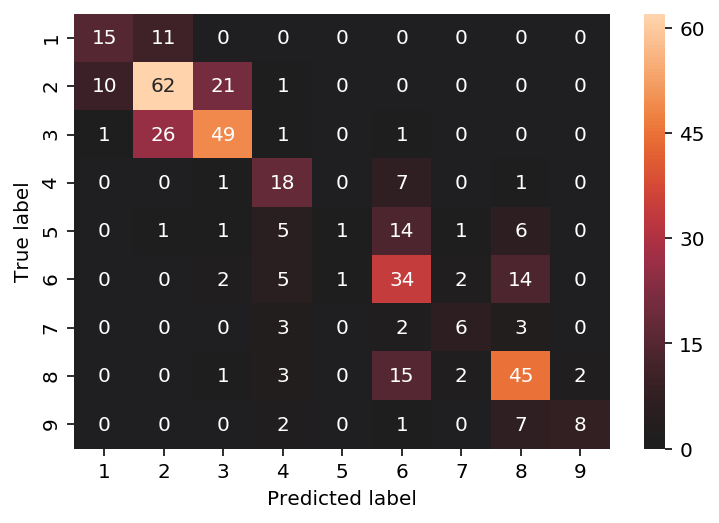

In [45]:
sns.heatmap(cm,annot=True, center=True,fmt='d',xticklabels=temp,yticklabels=temp)
plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.show()